## Collect dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
file = r'dataset\features\EURUSD_3.csv'
df = pd.read_csv(file)
df.set_index('date', inplace=True, drop=True)

## Features and Targets

In [4]:
features = df.copy()
features = features.drop(['open_24', 'close_24'], axis=1)
# features = df[['open', 'high', 'low', 'close','bb_bbm_6',
#        'bb_bbh_6', 'bb_bbl_6', 'bb_bbm_12', 'bb_bbh_12', 'bb_bbl_12',
#        'bb_bbm_18', 'bb_bbh_18', 'bb_bbl_18', 'bb_bbm_24', 'bb_bbh_24',
#        'bb_bbl_24', 'bb_bbm_30', 'bb_bbh_30', 'bb_bbl_30', 'bb_bbm_36',
#        'bb_bbh_36', 'bb_bbl_36']].copy()
targets = df[['open_24', 'close_24']].copy()*10000
# sns.pairplot(features, corner=True)

## Normalize data & Split data

In [6]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(features.values)
y = sc_y.fit_transform(targets.values)


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.05)

y_train

array([[ 1.12983666,  1.14551444],
       [-0.33236017, -0.39658707],
       [ 0.46147618,  0.47898952],
       ...,
       [ 1.04257913,  1.04237   ],
       [-1.07370387, -1.07393294],
       [-0.13781501, -0.12675384]])

In [8]:
from sklearn.feature_selection import SelectKBest,f_regression,chi2

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

open 0: 1917735.937418
high 1: 1943961.044165
low 2: 1973849.309509
close 3: 2007208.598361
volume 4: 153.360263
isFriday 5: 0.001352
isMonday 6: 0.428159
MOM_6 7: 48.025574
MOM_12 8: 95.496773
MOM_24 9: 178.932777
K_6 10: 124.629203
D_6 11: 137.315469
K_12 12: 181.835750
D_12 13: 188.977043
K_24 14: 277.992730
D_24 15: 284.820039
MACD_2 16: 58.751162
MACDsignal_2 17: 67.506477
MACDhist_6 18: 0.050953
MACD_5 19: 130.918493
MACDsignal_4 20: 148.234446
MACDhist_12 21: 0.099667
MACD_11 22: 264.978889
MACDsignal_8 23: 295.149832
MACDhist_24 24: 0.217839
EMA_6 25: 1910130.607695
EMA_12 26: 1785148.141473
EMA_24 27: 1578493.196116
bb_bbm_6 28: 1869105.809251
bb_bbh_6 29: 1703632.232051
bb_bbl_6 30: 1770003.707612
bb_bbm_12 31: 1713783.172703
bb_bbh_12 32: 1485997.296655
bb_bbl_12 33: 1566669.200895
bb_bbm_24 34: 1471647.179839
bb_bbh_24 35: 1213601.945060
bb_bbl_24 36: 1298646.238030
RSI_6 37: 130.873577
RSI_12 38: 222.036004
RSI_24 39: 376.335666


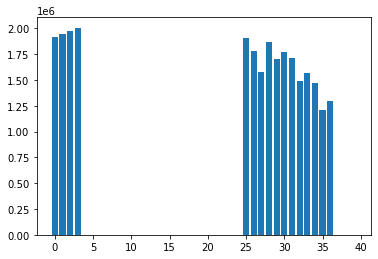

In [10]:
from matplotlib import pyplot

X_train_fs, X_test_fs, fs = select_features(x_train, y_train[:,0], x_test)
fea = features.columns.values
for i in range(len(fs.scores_)):
	print('%s %d: %f' % (fea[i],i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

open: , Score: 0.00092
high: , Score: 0.04749
low: , Score: 0.22276
close: , Score: 0.63677
volume: , Score: 0.00069
isFriday: , Score: 0.00020
isMonday: , Score: 0.00019
MOM_6: , Score: 0.00020
MOM_12: , Score: 0.00028
MOM_24: , Score: 0.00072
K_6: , Score: 0.00021
D_6: , Score: 0.00023
K_12: , Score: 0.00021
D_12: , Score: 0.00025
K_24: , Score: 0.00040
D_24: , Score: 0.00046
MACD_2: , Score: 0.00014
MACDsignal_2: , Score: 0.00015
MACDhist_6: , Score: 0.00026
MACD_5: , Score: 0.00024
MACDsignal_4: , Score: 0.00035
MACDhist_12: , Score: 0.00029
MACD_11: , Score: 0.00062
MACDsignal_8: , Score: 0.00124
MACDhist_24: , Score: 0.00052
EMA_6: , Score: 0.05027
EMA_12: , Score: 0.00065
EMA_24: , Score: 0.00083
bb_bbm_6: , Score: 0.01405
bb_bbh_6: , Score: 0.00251
bb_bbl_6: , Score: 0.00190
bb_bbm_12: , Score: 0.00065
bb_bbh_12: , Score: 0.00875
bb_bbl_12: , Score: 0.00059
bb_bbm_24: , Score: 0.00046
bb_bbh_24: , Score: 0.00111
bb_bbl_24: , Score: 0.00114
RSI_6: , Score: 0.00018
RSI_12: , Scor

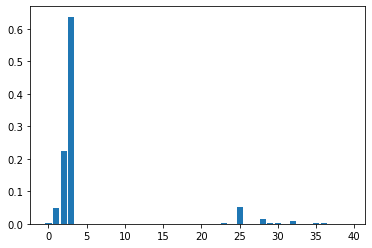

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

importance = model.feature_importances_

for i,v in enumerate(importance):
	print('%s: , Score: %.5f' % (fea[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

ModuleNotFoundError: No module named 'xgboost'